<a href="https://colab.research.google.com/github/Wf-max/Wei-and-Yuxi-Deep-and-Generative-Learning/blob/main/Milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
image_folder = "/content/drive/MyDrive/image"


In [7]:
import os
print(os.listdir(image_folder))


['1018.png', '1019.png', '1011.png', '1005.png', '1004.png', '1697.png', '1010.png', '1009.png', '1008.png', '1020.png', '1014.png', '1001.png', '1000.png', '1015.png', '1003.png', '1017.png', '1016.png', '1006.png', '1002.png', '1012.png', '1013.png', '1007.png']


In [8]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
metadata_path = "/content/MetaData.csv"


In [10]:
df = pd.read_csv(metadata_path)

In [11]:
def load_images(image_folder, df, img_size=(224, 224)):
    images, labels = [], []

    for _, row in df.iterrows():
        img_path = os.path.join(image_folder, str(row['id']) + ".png")  # Convert ID to string

        if os.path.exists(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
            img = cv2.resize(img, img_size) / 255.0  # Resize and normalize

            images.append(img)
            labels.append(row['ptb'])  # Assuming 'ptb' column (0 = Normal, 1 = TB Positive)

    return np.array(images).reshape(-1, img_size[0], img_size[1], 1), np.array(labels)


In [14]:
X, y = load_images(image_folder, df)
y = to_categorical(y, num_classes=2)  # Convert labels to categorical (0: Normal, 1: TB)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Test Samples: {len(X_test)}")

Training Samples: 17, Test Samples: 5


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [17]:
# Build CNN Model
def build_model(input_shape=(224, 224, 1)):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(2, activation='softmax')  # Output layer for 2 classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
# Initialize model
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,168,642 (42.60 MB)

 Trainable params: 11,168,642 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("tb_detection_model.h5")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4118 - loss: 0.7005 - val_accuracy: 0.4000 - val_loss: 1.1382
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 1.2217 - val_accuracy: 0.6000 - val_loss: 0.7677
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4706 - loss: 0.8041 - val_accuracy: 0.6000 - val_loss: 0.6726
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4706 - loss: 0.7464 - val_accuracy: 0.4000 - val_loss: 0.8107
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 0.7585 - val_accuracy: 0.4000 - val_loss: 0.7234
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5294 - loss: 0.6434 - val_accuracy: 0.4000 - val_loss: 0.7085
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5882 - loss: 0.6300 - val_accuracy: 0.4000 - val_loss: 0.7058
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6471 - loss: 0.6183 - val_accuracy: 0.4000 - val_loss: 0.7139
Epoch 9/10
1/1 ━

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("tb_detection_model.h5")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8235 - loss: 0.5149 - val_accuracy: 0.4000 - val_loss: 0.9605
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6471 - loss: 0.7420 - val_accuracy: 0.8000 - val_loss: 0.5807
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8824 - loss: 0.3804 - val_accuracy: 0.8000 - val_loss: 0.5757
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8235 - loss: 0.4397 - val_accuracy: 0.8000 - val_loss: 0.5698
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9412 - loss: 0.3112 - val_accuracy: 0.6000 - val_loss: 0.6120
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8824 - loss: 0.3693 - val_accuracy: 0.6000 - val_loss: 0.7207
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.2311 - val_accuracy: 0.6000 - val_loss: 0.7017
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.1795 - val_accuracy: 0.8000 - val_loss: 0.5068
Epoch 9/10
1/1 ━

In [21]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8000 - loss: 0.6265
Test Accuracy: 80.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


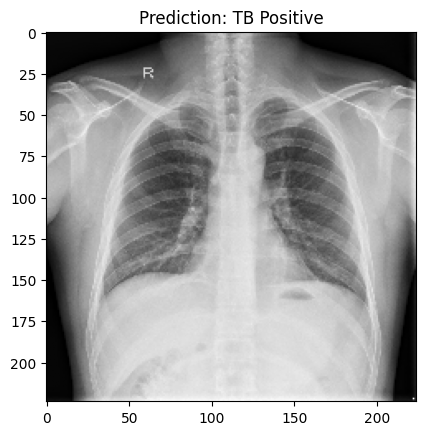

In [22]:
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Correctly load image
    img = cv2.resize(img, (224, 224)) / 255.0
    img = img.reshape(1, 224, 224, 1)  # Reshape for model input

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)

    labels = {0: "Normal", 1: "TB Positive"}

    plt.imshow(img.squeeze(), cmap='gray')  # Display the processed image
    plt.title(f"Prediction: {labels[class_idx]}")
    plt.show()

# Example Usage
# Use a valid image path
image_path = "/content/drive/MyDrive/image/1000.png"  # Assuming '1000.png' is an image file
predict_image(image_path)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [14]:
img_size = (128, 128)

# 加载医学影像数据集
def load_images(image_paths, img_size=(128, 128)):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = (img - 0.5) * 2
            images.append(img)
    return np.expand_dims(np.array(images), axis=-1)
image_paths = [
    "/content/1000.png", "/content/1001.png", "/content/1002.png",
    "/content/1003.png", "/content/1004.png", "/content/1005.png",
    "/content/1006.png", "/content/1007.png", "/content/1008.png",
    "/content/1009.png"
]

data = load_images(image_paths)

In [15]:
def build_generator(latent_dim):
    model = Sequential([
        Dense(16 * 16 * 256, input_dim=latent_dim),
        Reshape((16, 16, 256)),
        BatchNormalization(),
        Conv2DTranspose(256, kernel_size=4, strides=2, padding='same', activation='relu'),  # 变成 32x32
        BatchNormalization(),
        Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),  # 变成 64x64
        BatchNormalization(),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),  # 变成 128x128
        BatchNormalization(),
        Conv2DTranspose(1, kernel_size=4, strides=1, padding='same', activation='tanh')  # 确保生成 (128,128,1)
    ])
    return model



In [16]:
generator = build_generator(latent_dim)
generated_sample = generator.predict(np.random.normal(0, 1, (1, latent_dim)))
print(f"Generated image shape: {generated_sample.shape}")  # 应该是 (1, 128, 128, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Generated image shape: (1, 128, 128, 1)


In [17]:
def build_discriminator():
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(128, 128, 1)),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Conv2D(128, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Conv2D(256, kernel_size=4, strides=2, padding='same'),  # 额外增加一层
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model



In [18]:
def train_gan(data, epochs=20000, batch_size=64):
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_imgs = data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, real)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, real)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: D Loss={d_loss[0]}, G Loss={g_loss}")
            generate_and_save_images(generator, epoch)

In [19]:
def generate_and_save_images(generator, epoch, latent_dim=128):
    noise = np.random.normal(0, 1, (16, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = (gen_imgs + 1) / 2

    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[i * 4 + j, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
    plt.show()


In [20]:
latent_dim = 128
generator = build_generator(latent_dim)
discriminator = build_discriminator()


discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001, 0.5), metrics=['accuracy'])
discriminator.trainable = False


gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001, 0.5))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss=9.564064025878906, G Loss=0.6989229917526245
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


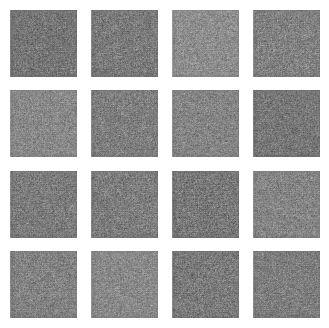

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


In [21]:
epochs = 10
train_gan(data, epochs=epochs, batch_size=64)
